In [14]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

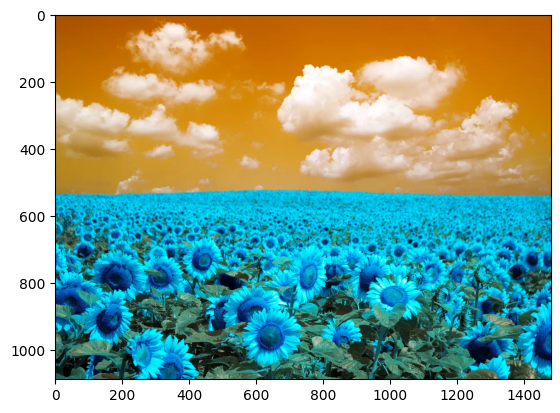

In [15]:
# import image
bgrImg = cv2.imread("Input.png")
plt.imshow(bgrImg)

In [16]:
h= bgrImg.shape[0]
w= bgrImg.shape[1]
d= bgrImg.shape[2]

In [17]:
def bgr_to_rgb(bgrImg):
    bgrImg = np.array(bgrImg)
    b = bgrImg[0][0][0]
    g = bgrImg[0][0][1]
    r = bgrImg[0][0][2]

    rgbImg = np.uint8([[[r,g,b]]])
    return rgbImg

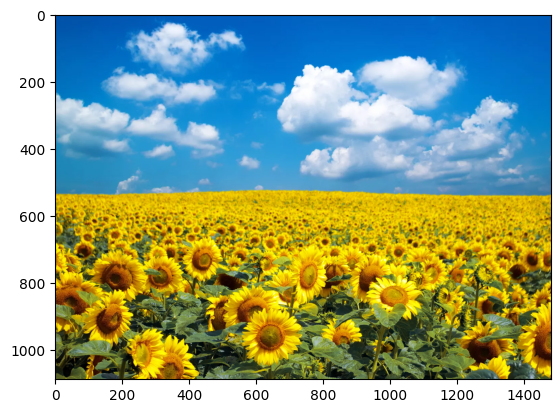

In [18]:
rgbImg = copy.deepcopy(bgrImg)
for y in range(0,h):
    for x in range(0,w):
        
        dot = bgrImg[y][x]
        rgbImg[y][x] = bgr_to_rgb([[dot]])

plt.imshow(rgbImg)

In [19]:

def rgb_2_hsv(rgb3d):
    # convert the rgb to hsv values
    # input :3-D RGB values
    # output:3-D HSV values
    rgb = rgb3d[0][0] #the rgb 1-D array from 3-D array
    rgb = rgb/255

    # Initialising the hsv values
    h=0.0
    s=0.0
    v=0.0
    #Finding the MAX and MIN values
    v=np.max(rgb)
    v_min=np.min(rgb)

    # setting saturation values
    if v > 0.0:
        s = (v-v_min)/v
    else:
        s = 0.0
    
    # calculating v-vmin 
    diff = v-v_min
    # Are r,g,b equal. 
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[2] == v):
        h = 240 + 60 * (rgb[0] - rgb[1]) / diff
    h=round(h/2)
    #Normalizing the color values to cv2 standards
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    return np.array([[[h,s,v]]])


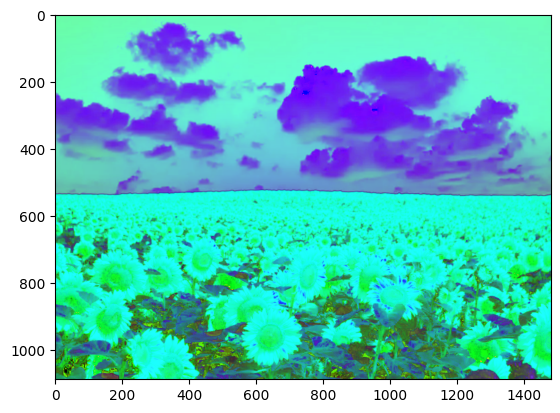

In [20]:
hsvImg = copy.deepcopy(rgbImg)
for y in range(0,h):
    for x in range(0,w):
        
        dot = rgbImg[y][x]
        hsvImg[y][x] = rgb_2_hsv([[dot]])

plt.imshow(hsvImg)

In [21]:
top_left = (0,0)
bottom_right = (1500,1200)

rect_color = (255,0,0)

thickness = 5

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


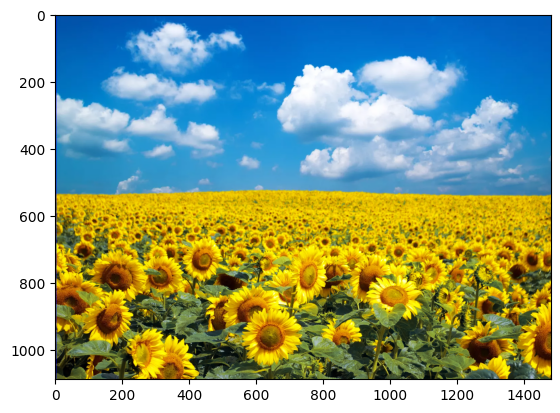

In [23]:
img_rect = cv2.rectangle(bgrImg, top_left, bottom_right, rect_color, thickness)

img_rect = cv2.cvtColor(img_rect , cv2.COLOR_BGR2RGB)

plt.imshow(img_rect)

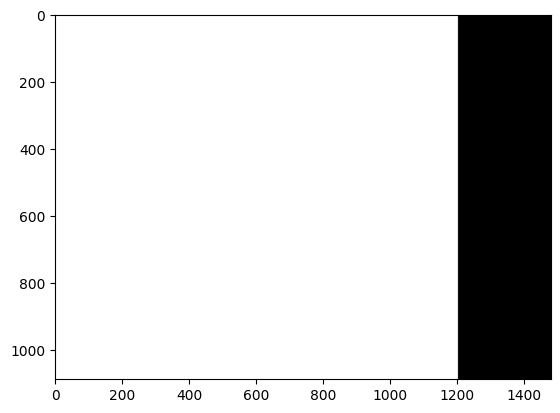

In [24]:
# create an mask
mask = np.zeros(bgrImg.shape[:2], np.uint8)

mask[0:1500, 0:1200] = 255

plt.imshow(mask, cmap="gray")


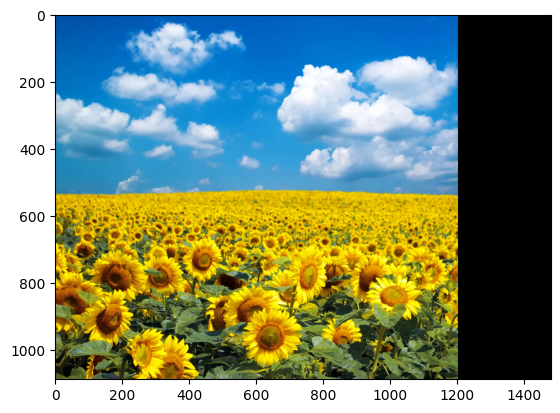

In [25]:
img_masked = cv2.bitwise_and(rgbImg, rgbImg, mask = mask)

plt.imshow(img_masked)

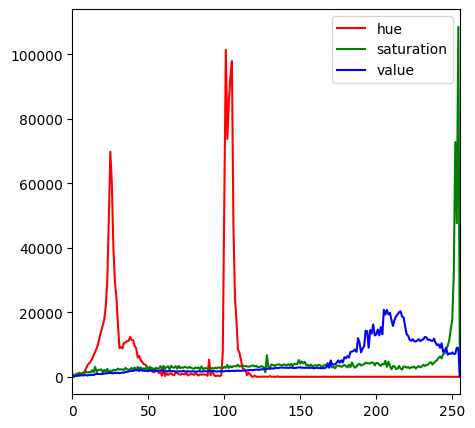

In [26]:
# plot the hue,saturation values
fig = plt.figure(figsize=(5,5))

hist = cv2.calcHist([hsvImg],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

hist = cv2.calcHist([hsvImg],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

hist = cv2.calcHist([hsvImg],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper right')
plt.show()

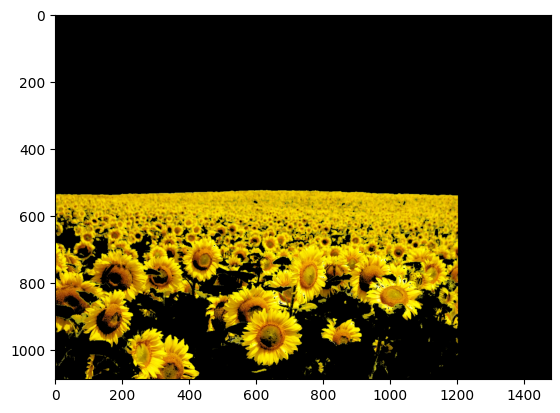

In [27]:
# minimum and maximum hsv values
min_hsv = np.array([0,50,100], np.uint8)

max_hsv = np.array([30,255,255], np.uint8)

skinArea = cv2.inRange(hsvImg, min_hsv, max_hsv)

skinHsv = cv2.bitwise_and(img_masked, img_masked, mask = skinArea)


plt.imshow(skinHsv)